# Causal Graph
This tutorial aims to explain different types of causal graphs and how to generate them.
We will cover the following parts:
* 1 - No-label Causal Graph
* 2 - Lag-label Causal Graph
* 3 - Score-label Causal Graph

<br>
First of all, we need to import the following packages:

In [20]:
from fpcmci.preprocessing.data import Data
from fpcmci.FPCMCI import FPCMCI
from fpcmci.selection_methods.TE import TE, TEestimator
from fpcmci.CPrinter import CPLevel
from fpcmci.basics.utils import LabelType
from tigramite.independence_tests.gpdc import GPDC
import numpy as np
import warnings
warnings.filterwarnings('ignore')

Then, we need time-series data for the causal analysis. In this case, we can generate it by a simple non-linear system of equations defined as follows:

In [21]:
max_lag = 2 # maximum lag time of the dependencies
min_lag = 1 # minimum lag time of the dependencies
    
np.random.seed(1)
T = 1500 # time-series length
N = 6 # number of equations/features involved in the system

d = np.random.random(size = (T, N)) # system initialised with uniform noise
for t in range(max_lag, T):
    d[t, 0] += 2 * d[t-2, 1] + 3 * d[t-1, 3]
    d[t, 2] += 1.1 * d[t-1, 1]**2
    d[t, 3] += d[t-1, 3] * d[t-2, 2]
    d[t, 4] += d[t-1, 5] * d[t-1, 0]
    
df = Data(d)

We have now a `Data` object ready for the causal analysis. For more information about how to generate and preprocess data take a look at this [tutorial](https://github.com/lcastri/fpcmci/blob/main/tutorials/data_loading_and_preprocessing.ipynb).
<br><br>
Now, we perform the causal analysis on this data as follows:

In [22]:
alpha = 0.05       

fpcmci = FPCMCI(df, 
            f_alpha = alpha, 
            pcmci_alpha = alpha, 
            min_lag = min_lag, 
            max_lag = max_lag, 
            sel_method = TE(TEestimator.Gaussian), 
            val_condtest = GPDC(significance = 'analytic', gp_params = None),
            verbosity = CPLevel.DEBUG)
    
sel_var, cm = fpcmci.run()



-------------------------------------------------------
Selecting relevant features among: ['X_0', 'X_1', 'X_2', 'X_3', 'X_4', 'X_5']
Selection method: Transfer Entropy
Significance level: 0.05
Max lag time: 2
Min lag time: 1
Data length: 1500

##
## Transfer Entropy analysis
##

## Target variable: X_0
(X_0 -1)             -->      (X_0)     |score: 0.229       |pval: 0.002        
(X_0 -2)             -->      (X_0)     |score: 0.002       |pval: 0.002        
(X_3 -1)             -->      (X_0)     |score: 3.154       |pval: 0.002        
(X_1 -2)             -->      (X_0)     |score: 0.794       |pval: 0.002        

## Target variable: X_1
no sources selected

## Target variable: X_2
(X_1 -1)             -->      (X_2)     |score: 0.353       |pval: 0.002        

## Target variable: X_3
(X_3 -1)             -->      (X_3)     |score: 0.546       |pval: 0.002        
(X_2 -2)             -->      (X_3)     |score: 0.263       |pval: 0.002        

## Target variable: X_4
(X_4 -

we can now generate the causal graph.

## 1 - No-label Causal Graph

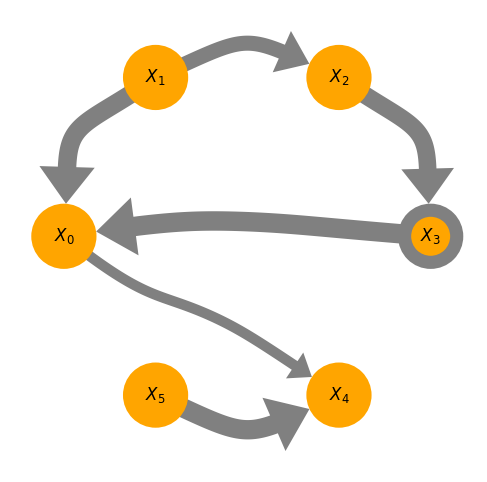

In [23]:
fpcmci.dag(label_type = LabelType.NoLabels, node_layout = 'circular')

## 2 - Lag-label Causal Graph

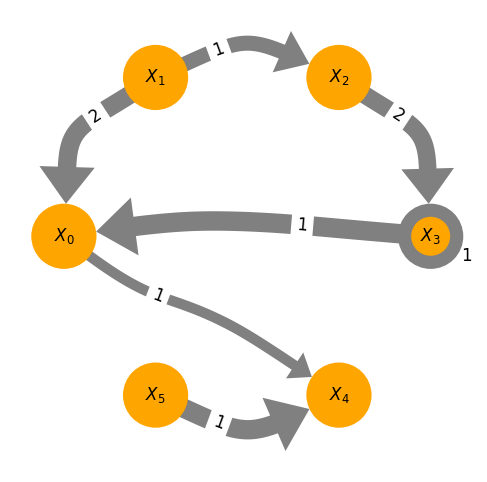

In [24]:
fpcmci.dag(label_type = LabelType.Lag, node_layout = 'circular')

## 3 - Score-label Causal Graph

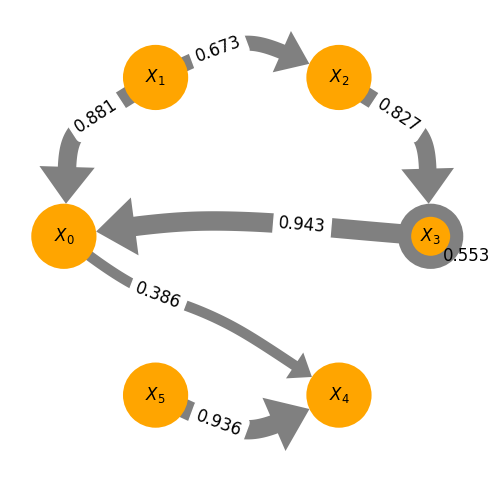

In [25]:
fpcmci.dag(label_type = LabelType.Score, node_layout = 'circular')